# Deep Learning week - Day 4 - Predict Air Pollution

### Exercise objectives
- Prepare the data
- Further dig into Recurrent Neural Networks
- Stack multiple layers of RNNs

<hr>
<hr>

In this exercise, you will predict the pollution (measured as a number of particles) on the next day given a sequence of weather features, such as the temperature, the pression, etc.

In real-life applications, the data are not as well-prepared as in the previous exercises. For this reason, the first steps of the notebook correspond to the data preparation.

Then, given your new RNN ninja skills and the fact that the exercise is similar to previous challenges, less help is given as how to write a RNN. This can happen in real-life problems where you will always be able to get back to Le Wagon exercise to copy-paste what you have done to start working.


<hr><hr>

# Data

The data here corresponds to hourly measurements of the air pollution (feature: `pm2.5`, which is the concentration of 2.5 millimeter particles) that you will try to predict. Among the other related features, you have:
- TEMP: Temperature
- DEWP: Dew Point
- PRES: Pressure
- Ir: Cumulated hours of rain
- Iws: Cumulated wind speed
- Is: Cumulated hours of snow

❓ **Question** ❓ Load the data `data.txt` - use the first column as the index of a panda Dataframe.
Let's consider only the features presented above (pm2.5, TEMP, DEWP, PRES, Ir, Iws and Is)

In [1]:
### YOUR CODE HERE

In [2]:
##############
### Answer ###
##############

import pandas as pd

df = pd.read_csv('data.txt', index_col=[0])
df = df[['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Ir', 'Is', 'Iws']]

❓ **Question** ❓ Plot the temporal progression of the different variables

In [3]:
### YOUR CODE HERE

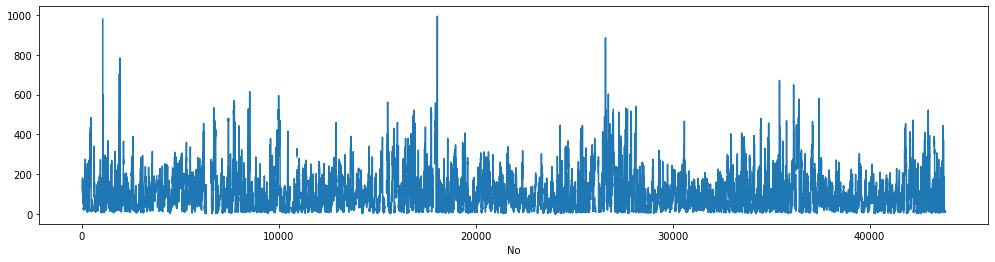

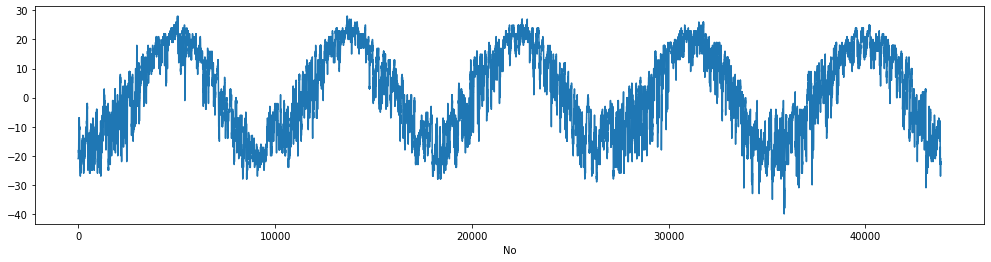

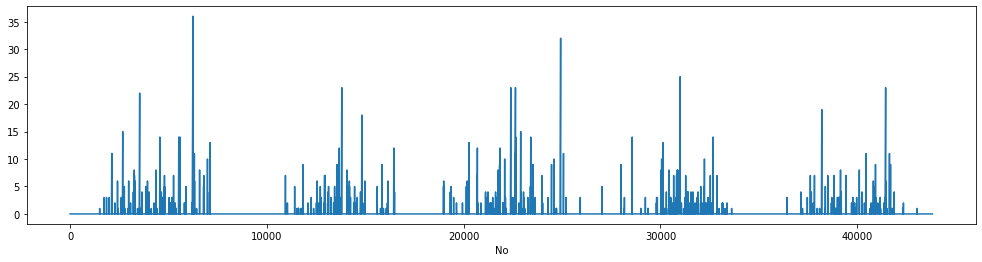

In [4]:
##############
### Answer ###
##############

import matplotlib.pyplot as plt
%matplotlib inline

df['pm2.5'].plot(figsize=(17, 4))
plt.show()

df['DEWP'].plot(figsize=(17, 4))
plt.show()

df['Ir'].plot(figsize=(17, 4))
plt.show()

❓ **Question** ❓ Let's normalize the variables `pm2.5` and `PRES` as their value can get very high. Just divide their values by a factor 1000.

In [5]:
### YOUR CODE HERE

In [6]:
##############
### Answer ###
##############

df['pm2.5'] = df['pm2.5']/1000
df['PRES'] = df['PRES']/1000

In the previous exercises, we had multiple independent data sequences. Here, you notice that there is only one. And this is quite often the case. So how to deal with such data? In fact, this long sequence can be separated in a lot of short sequences that we will consider as independant. 

❓ **Question** ❓ Write a function that, given the initial dataframe, return a shorter dataframe sequence of length `length`. This shorter sequence should be selected at random.

In [7]:
def subsample_sequence(df, length):
    ### YOUR CODE HERE
    return df_sample

df_subsample = subsample_sequence(df, length=10)

NameError: name 'df_sample' is not defined

In [8]:
##############
### Answer ###
##############

import numpy as np

def subsample_sequence(df, length):
    
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]
    
    return df_sample

df_subsample = subsample_sequence(df, 10)

❓ **Question** ❓ Write a function that given a full dataframe, first subsample this dataset into a shorter sequence, and then splits the shorter dataframe into a training sequence and a value to predict.

Basically, if your sub-sampled dataframe is of size N, you will take the features during the N-1 first days as your variables `X`, and the value of the pollution at day N as your variable `y`.

❗ **Remark**❗ There are missing values in the dataframe. If the value to predict `y` is missing, the function should rerun. If there are missing values in the variables `X`, then it should be replaced by the mean values over the other selected hours. If all the other hours are missing, then they should all be replaced by the mean value of the dataframe.

❗ **Remark**❗ The outputs should be arrays or list, not a dataframe.

In [ ]:
def split_subsample_sequence(df, length):
    df_subsample = subsample_sequence(df, length)
    
    ### YOUR CODE HERE
    
    return X_subsample, y_subsample

df_subsample = split_subsample_sequence(df, 30)

In [9]:
##############
### Answer ###
##############

def fillna(X, df_mean):
    # Replace with NaN of the other hours. 
    na = X.mean()
    
    # If the other hours are also nans, then replace with mean value of the dataframe
    na.fillna(df_mean)
    return na

def split_subsample_sequence(df, length, df_mean=None):
    # Little trick to improve the time
    if df_mean is None:
        df_mean = df.mean()
              
    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[df_subsample.shape[0]-1]['pm2.5']
    
    if y_sample != y_sample: # A value is not equal to itself only for NaN. So it will be True if y_sample is nan
        X_sample, y_sample = split_subsample_sequence(df, length, df_mean)
        return np.array(X_sample), np.array(y_sample)
    
    X_sample = df_subsample[0:df_subsample.shape[0]-1]
    X_sample = X_sample.fillna(fillna(X_sample, df_mean))
    X_sample = X_sample.values
    
    return np.array(X_sample), np.array(y_sample)

In [10]:
split_subsample_sequence(df, 10)

(array([[ 0.198,  8.   , -2.   ,  1.02 ,  0.   ,  0.   ,  1.78 ],
        [ 0.216,  9.   , -2.   ,  1.019,  0.   ,  0.   ,  2.67 ],
        [ 0.225,  9.   , -1.   ,  1.019,  0.   ,  0.   ,  3.56 ],
        [ 0.248,  9.   , -1.   ,  1.018,  0.   ,  0.   ,  0.89 ],
        [ 0.27 ,  7.   ,  0.   ,  1.018,  0.   ,  0.   ,  0.89 ],
        [ 0.296,  5.   , -1.   ,  1.018,  0.   ,  0.   ,  1.79 ],
        [ 0.283,  5.   ,  0.   ,  1.019,  0.   ,  0.   ,  0.45 ],
        [ 0.261,  4.   ,  0.   ,  1.019,  0.   ,  0.   ,  0.9  ],
        [ 0.264,  4.   ,  0.   ,  1.019,  0.   ,  0.   ,  1.79 ]]),
 array(0.282))

❓ **Question** ❓ Thanks to the previous function, write another function that generates an entire dataset $(X, y)$ of multiple subsamples, given an initial dataframe `df`, a number of desired sequences, and a `length` for each sequence.

In [11]:
def get_X_y(df, number_of_sequences, length):
    ### YOUR CODE HERE
    return X, y

In [12]:
##############
### Answer ###
##############

def get_X_y(df, number_of_sequences, length):
    X, y = [], []

    for i in range(number_of_sequences):
        xi, yi = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
        
    return X, y

❓ **Question** ❓ Generate a dataset $(X, y)$ with consists of 100 sequences, each of 20 observations - the value of the pollution at the 21-st day being the value to predict.

In [ ]:
### YOUR CODE HERE

In [13]:
##############
### Answer ###
##############

X, y = get_X_y(df, 100, 21)

In [ ]:
y[0]

In [ ]:
X[0]

❓ **Question** ❓ Check the shape of your inputs. `X` should be of size (100, 20, 7) ( => (sequences, length, number of features) )

In [ ]:
### YOUR CODE HERE

In [ ]:
##############
### Answer ###
##############

print(np.shape(X))

❗ **IMPORTANT REMARK: POTENTIAL DATA LEAKAGE**❗ If you split this dataset (X, y) into a training and a test set, it is much likely that some data in the train set are in the test set. Especially, you will predict data in test that are input data in train.

To avoid this situation, you should _first_ separate your initial dataframe `df` into a training dataframe  and test dataframe.

❓ **Question** ❓ Separate `df` into `df_train` and `df_test` such that the first 80% of the dataframe are in the training. And the last 20% in the test set.

In [ ]:
### YOUR CODE HERE

In [15]:
##############
### Answer ###
##############

len_ = int(0.8*df.shape[0])

df_train = df[:len_]
df_test = df[len_:]

❓ **Question** ❓ Now, you can generate (X_train, y_train) from df_train and (X_test, y_test) from df_test.
The training test should correspond to 1000 sequences, each of size 50 (+ the time to predict). The test set should correspond to 200 sequences

In [ ]:
### YOUR CODE HERE

In [16]:
##############
### Answer ###
##############

X_train, y_train = get_X_y(df_train, 1000, 51)
X_test, y_test = get_X_y(df_test, 200, 51)


❓ **Question** ❓ Initialize a model the way you want and compile it within the `init_model` function. _TRY_ to do it, before looking at the previous exercise.
Start here with a simple `LSTM`.

In [ ]:
def init_model():
    ### YOUR CODE HERE

In [17]:
##############
### Answer ###
##############

from tensorflow.keras import models
from tensorflow.keras import layers

def init_model():
    
    model = models.Sequential()
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['mae'])
    
    return model

❓ **Question** ❓ Fit your model and evaluate it on the test data

In [ ]:
### YOUR CODE HERE

In [18]:
##############
### Answer ###
##############

from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

model.fit(X_train, y_train,
            validation_split=0.2,
            epochs=1000, 
            batch_size=32,
            callbacks=[es])

Epoch 1/1000
25/25 [==============================] - 1s 49ms/step - loss: 0.0256 - mae: 0.1205 - val_loss: 0.0133 - val_mae: 0.0900
Epoch 2/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.0089 - mae: 0.0718 - val_loss: 0.0083 - val_mae: 0.0698
Epoch 3/1000
25/25 [==============================] - 1s 22ms/step - loss: 0.0065 - mae: 0.0600 - val_loss: 0.0065 - val_mae: 0.0606
Epoch 4/1000
25/25 [==============================] - 1s 22ms/step - loss: 0.0056 - mae: 0.0555 - val_loss: 0.0059 - val_mae: 0.0580
Epoch 5/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.0052 - mae: 0.0534 - val_loss: 0.0055 - val_mae: 0.0560
Epoch 6/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.0051 - mae: 0.0527 - val_loss: 0.0053 - val_mae: 0.0555
Epoch 7/1000
25/25 [==============================] - 1s 22ms/step - loss: 0.0048 - mae: 0.0517 - val_loss: 0.0052 - val_mae: 0.0548
Epoch 8/1000
25/25 [==============================] - 1s 21ms/step - 

In [19]:
##############
### Answer ###
##############

res = model.evaluate(X_test, y_test, verbose=0)

print(f'MAE on the test set : {res[1]:.4f}')

MAE on the test set : 0.0433


❓ **Question** ❓ Compare your prediction to a benchmark prediction

In [ ]:
# To complete

In [20]:
##############
### Answer ###
##############

# We here decide to predict the mean of the train set y_train

y_pred = np.mean(y_train)
bench_res = np.mean(np.abs(y_test - y_pred))


print(f'Benchmark MAE on the test set : {bench_res:.4f}')

Benchmark MAE on the test set : 0.0681


# Stack RNN layers

❓ **Question** ❓ Now that you know how to write a recurrent architecture, let's see how to stack one.
If you want to stack multiple RNN, LSTM, GRU layers, it is very easy. Do it as if they were Dense (or any other) layers.

But don't forget: All RNN (**EXCEPT** the last one) should have the `return_sequences` set to True so that the entire sequence of predictions of a given layer is given to the next layer. Otherwise, you will only give the last prediction to the next layer.

In [ ]:
def init_model_2():
    ### YOUR CODE HERE 

In [21]:
##############
### Answer ###
##############

def init_model_2():
    
    model = models.Sequential()
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['mae'])
    
    return model

model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train,
            validation_split=0.3,
            epochs=1000, 
            batch_size=32,
            callbacks=[es])

Epoch 1/1000
22/22 [==============================] - 2s 106ms/step - loss: 0.0284 - mae: 0.1200 - val_loss: 0.0121 - val_mae: 0.0794
Epoch 2/1000
22/22 [==============================] - 2s 70ms/step - loss: 0.0085 - mae: 0.0676 - val_loss: 0.0092 - val_mae: 0.0705
Epoch 3/1000
22/22 [==============================] - 1s 67ms/step - loss: 0.0070 - mae: 0.0618 - val_loss: 0.0086 - val_mae: 0.0668
Epoch 4/1000
22/22 [==============================] - 1s 67ms/step - loss: 0.0059 - mae: 0.0569 - val_loss: 0.0074 - val_mae: 0.0625
Epoch 5/1000
22/22 [==============================] - 1s 63ms/step - loss: 0.0054 - mae: 0.0535 - val_loss: 0.0068 - val_mae: 0.0610
Epoch 6/1000
22/22 [==============================] - 1s 63ms/step - loss: 0.0050 - mae: 0.0516 - val_loss: 0.0061 - val_mae: 0.0570
Epoch 7/1000
22/22 [==============================] - 1s 60ms/step - loss: 0.0048 - mae: 0.0503 - val_loss: 0.0063 - val_mae: 0.0564
Epoch 8/1000
22/22 [==============================] - 1s 62ms/step -

❓ **Question** ❓ Evaluate your new model to the previous prediction and to the baseline model

In [ ]:
### YOUR CODE HERE

In [22]:
##############
### Answer ###
##############

res = model_2.evaluate(X_test, y_test, verbose=0)

print(f'MAE on the test set : {res[1]:.4f}')

MAE on the test set : 0.0537


❓ **Question** ❓ Now, let's see how the performance changes depending on the number of seen days we used to sample our initial splits (50 days in the previous example).

For different values of temporal sequence lengths, resplit your data, run your model and evaluate its performance (do not forget to reinitialize your model between each run)

In [ ]:
### YOUR CODE HERE

In [23]:
##############
### Answer ###
##############

def train_model(nb_days):
    X_train, y_train = get_X_y(df_train, 1000, nb_days)
    X_test, y_test = get_X_y(df_test, 200, nb_days)
    
    model = init_model()
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

    model.fit(X_train, y_train,
                validation_split=0.3,
                epochs=200, 
                batch_size=32,
                callbacks=[es],
                verbose=1)
    
    res = model.evaluate(X_test, y_test, verbose=0)
    return res


MAE = []

nb_days_full = [21, 41, 61, 81, 101]

for nb_days in nb_days_full:

    res = train_model(nb_days)
    MAE.append(res[0])
    
    print(f'For {nb_days} days of observation, the MAE is of {res[0]:.4f}')

Epoch 1/200
22/22 [==============================] - 1s 35ms/step - loss: 0.5947 - mae: 0.6020 - val_loss: 0.2460 - val_mae: 0.4021
Epoch 2/200
22/22 [==============================] - 0s 19ms/step - loss: 0.1319 - mae: 0.2880 - val_loss: 0.0514 - val_mae: 0.1879
Epoch 3/200
22/22 [==============================] - 0s 18ms/step - loss: 0.0329 - mae: 0.1409 - val_loss: 0.0205 - val_mae: 0.1097
Epoch 4/200
22/22 [==============================] - 0s 18ms/step - loss: 0.0173 - mae: 0.0969 - val_loss: 0.0150 - val_mae: 0.0894
Epoch 5/200
22/22 [==============================] - 0s 18ms/step - loss: 0.0126 - mae: 0.0794 - val_loss: 0.0109 - val_mae: 0.0720
Epoch 6/200
22/22 [==============================] - 0s 17ms/step - loss: 0.0089 - mae: 0.0660 - val_loss: 0.0094 - val_mae: 0.0643
Epoch 7/200
22/22 [==============================] - 0s 16ms/step - loss: 0.0077 - mae: 0.0602 - val_loss: 0.0085 - val_mae: 0.0618
Epoch 8/200
22/22 [==============================] - 0s 16ms/step - loss: 0.

22/22 [==============================] - 1s 26ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0049 - val_mae: 0.0469
Epoch 35/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0025 - mae: 0.0376 - val_loss: 0.0050 - val_mae: 0.0475
Epoch 36/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0023 - mae: 0.0365 - val_loss: 0.0051 - val_mae: 0.0479
Epoch 37/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0024 - mae: 0.0363 - val_loss: 0.0047 - val_mae: 0.0463
Epoch 38/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0022 - mae: 0.0351 - val_loss: 0.0050 - val_mae: 0.0486
Epoch 39/200
22/22 [==============================] - 1s 28ms/step - loss: 0.0023 - mae: 0.0351 - val_loss: 0.0048 - val_mae: 0.0480
Epoch 40/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0049 - val_mae: 0.0479
Epoch 41/200
22/22 [==============================] - 1s 27ms/step - loss: 0.0021 

22/22 [==============================] - 1s 51ms/step - loss: 0.0042 - mae: 0.0487 - val_loss: 0.0062 - val_mae: 0.0561
Epoch 19/200
22/22 [==============================] - 1s 65ms/step - loss: 0.0041 - mae: 0.0476 - val_loss: 0.0062 - val_mae: 0.0550
Epoch 20/200
22/22 [==============================] - 2s 71ms/step - loss: 0.0040 - mae: 0.0474 - val_loss: 0.0058 - val_mae: 0.0555
Epoch 21/200
22/22 [==============================] - 1s 50ms/step - loss: 0.0039 - mae: 0.0470 - val_loss: 0.0058 - val_mae: 0.0568
Epoch 22/200
22/22 [==============================] - 1s 52ms/step - loss: 0.0038 - mae: 0.0463 - val_loss: 0.0056 - val_mae: 0.0553
Epoch 23/200
22/22 [==============================] - 1s 46ms/step - loss: 0.0038 - mae: 0.0464 - val_loss: 0.0059 - val_mae: 0.0569
Epoch 24/200
22/22 [==============================] - 1s 50ms/step - loss: 0.0037 - mae: 0.0456 - val_loss: 0.0057 - val_mae: 0.0545
Epoch 25/200
22/22 [==============================] - 1s 51ms/step - loss: 0.0037 

22/22 [==============================] - 1s 63ms/step - loss: 0.0034 - mae: 0.0435 - val_loss: 0.0055 - val_mae: 0.0543
Epoch 31/200
22/22 [==============================] - 1s 68ms/step - loss: 0.0034 - mae: 0.0432 - val_loss: 0.0056 - val_mae: 0.0550
Epoch 32/200
22/22 [==============================] - 2s 83ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0056 - val_mae: 0.0554
Epoch 33/200
22/22 [==============================] - 1s 63ms/step - loss: 0.0033 - mae: 0.0419 - val_loss: 0.0054 - val_mae: 0.0543
Epoch 00033: early stopping
For 101 days of observation, the MAE is of 0.0050


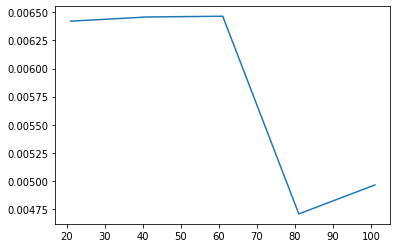

In [24]:
##############
### Answer ###
##############

plt.plot(nb_days_full, MAE)
plt.show()